# Analiz

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Housing.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Veri kümesi 21613 satır ve 21 sütun içermektedir. Her satır, bir ev satışına ilişkin bilgileri içerir. Amacımız, diğer sütunlardaki değerleri kullanarak "price" sütunundaki değeri tahmin etmektir. Bu sayede, evin özelliklerine dayanarak yeni satışların fiyatlarını tahmin edebiliriz.

Veri kümesinde yer alan sütunlar şunlardır:

In [3]:
# Veri kümesi hakkında bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Eksik değerleri kontrol
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Verilere kontrol ettiğimizde boş değerimiz bulunmamaktadır. Bu yüzden eksik verileri tamamlama adımını atlıyoruz.

Veri dağılımını inceleyelim

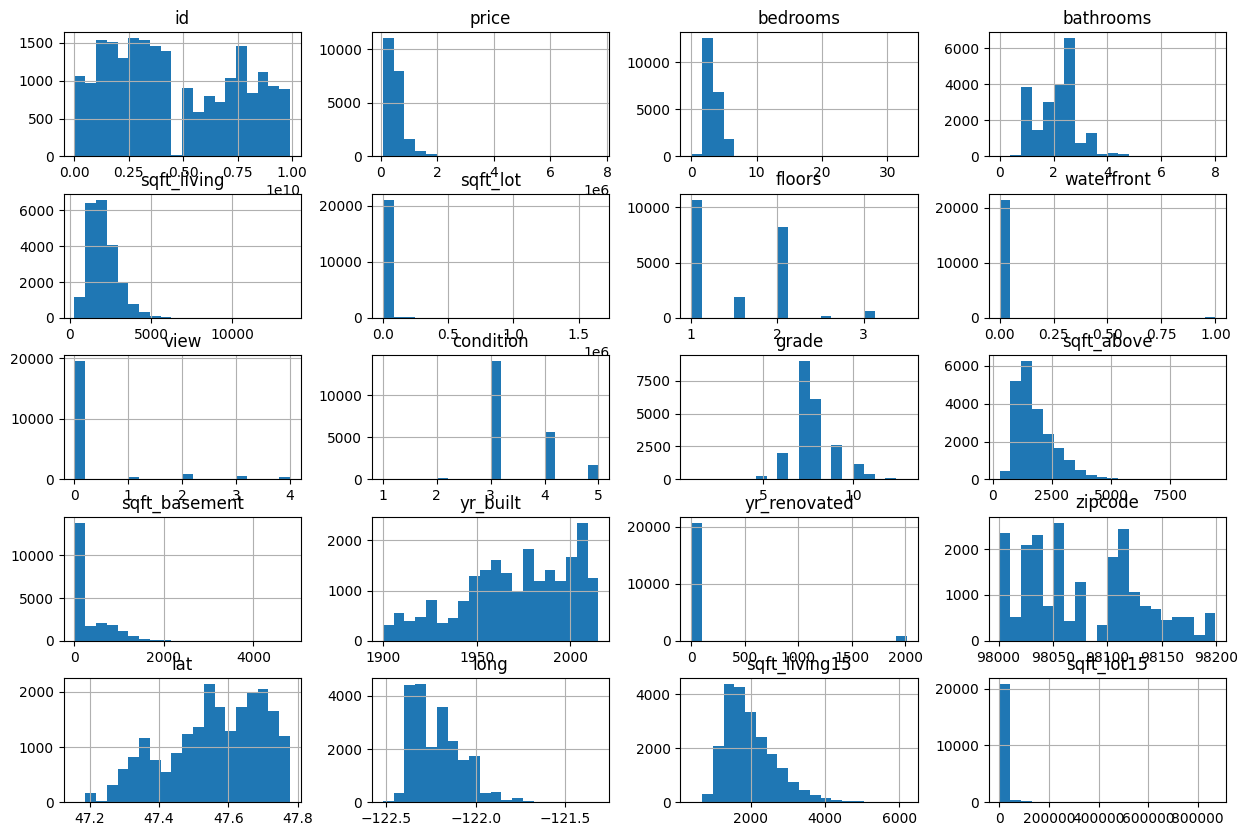

In [6]:
import matplotlib.pyplot as plt
# Sayısal değişkenlerin dağılımını görselleştirme
data.hist(bins=20, figsize=(15, 10))
plt.show()

Price (fiyat) sütununun diğer sütunlar ile arasında ki ilişkiye bakalım.

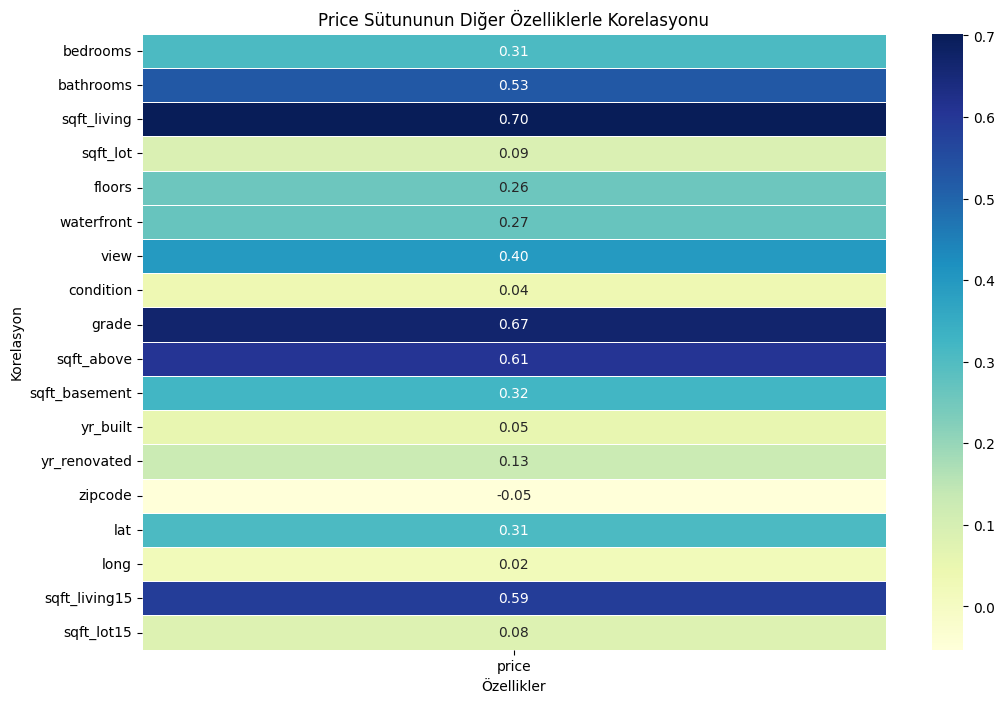

In [7]:
import seaborn as sns

# Korelasyon matrisini hesaplama
heat_data = data.drop(["date"], axis=1).corr()

# 'price' sütununun diğer sütunlarla olan korelasyonunu alma
price_corr = heat_data[['price']].drop(['id', 'price'])  # Sadece 'price' sütununu al ve 'price' sütununu çıkar

# Heatmap oluşturma
plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlama
sns.heatmap(price_corr, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)

# Grafik başlığı ve etiketler
plt.title('Price Sütununun Diğer Özelliklerle Korelasyonu')
plt.xlabel('Özellikler')
plt.ylabel('Korelasyon')
plt.show()

sqft_living: Yaşam alanı büyüklüğü metrekare cinsinden

grade: Genel not derecesi (1 ila 13) kategorik değişken yap iyi orta kötü

sqft_above: Zemin seviyesinden yüksek yaşam alanı metrekare cinsinden

sqft_living15: En yakın 15 mülkün yaşam alanı büyüklüğü metrekare cinsinden

bathrooms: Banyo sayısı

Price (fiyat) değerinin diğer değerler ile arasında ki ilişkiye bakıyoruz. 

sqft_living, grade, sqft_above, sqft_living15, bathrooms sütunları price sütunu ile arasında doğrusallık olduğunu gözlemliyoruz.

In [8]:
import folium

f = folium.Figure(width=500, height=500)
map = folium.Map(location=[data.lat.mean(), data.long.mean()], zoom_start=10).add_to(f)
folium.Marker(location=[data.lat.mean(), data.long.mean()], popup='Merkez Noktamız').add_to(map)

for i in range(10):
    sample_data = data.sample()
    folium.Marker(location=[sample_data.lat, sample_data.long], popup=f'Ev {i+1}').add_to(map)

map

c:\Users\ismai\anaconda3\Lib\site-packages\folium\utilities.py:94: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
c:\Users\ismai\anaconda3\Lib\site-packages\folium\utilities.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
c:\Users\ismai\anaconda3\Lib\site-packages\folium\utilities.py:102: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


# Ön İşleme

In [9]:
data = data.drop(["id"], axis=1)

In [10]:
# Tarih sütununu yıl ve ay olarak ayır
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.drop('date', axis=1, inplace=True)

Tarih sütununu formatladıktan sonra yıl ve ay değerlerini ayrı sütun olarak ayırıyoruz.

In [11]:
grade_data = data["grade"].value_counts()

Grade sütunu değer dağımlarına bakıyoruz.

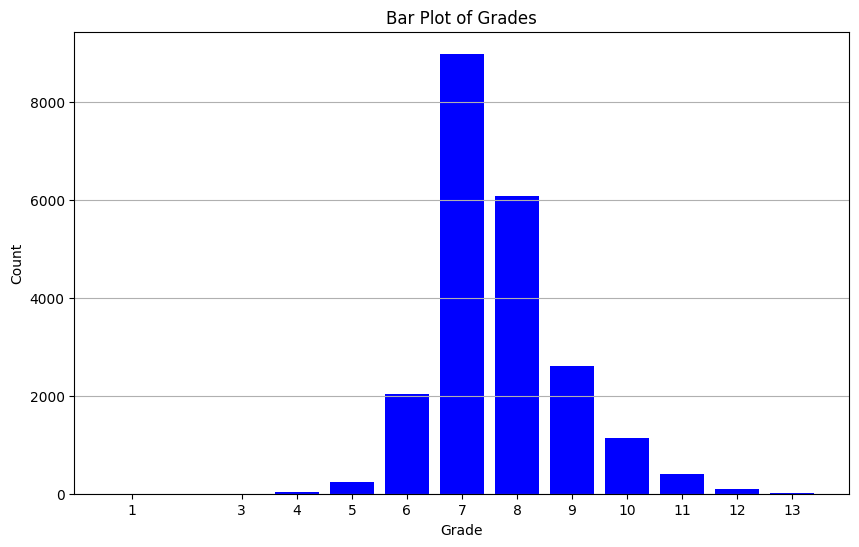

In [12]:
# Verileri x ve y eksenlerine ayırın
grades = grade_data.index
counts = grade_data.values

# Bar plot oluştur
plt.figure(figsize=(10, 6))
plt.bar(grades, counts, color='blue')

# Grafiği düzenle
plt.title('Bar Plot of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(grades)  # X eksenindeki değerleri doğru şekilde etiketle
plt.grid(axis='y')

# Grafiği göster
plt.show()

Grade sütunu dağılımlara baktığımızda bazı değerlerin çok yüksek bazı değerlerin az olması sebebiyle bu değerleri kategorik veriye dönüştürmek model performansını arttıracaktır.

Kötü, Orta, İyi olarak 3 'e bölüyoruz.

In [13]:
def categorize(value):
    if value < 7:
        return "kötü"
    elif 7 <= value <= 9:
        return "orta"
    else:
        return "iyi"

categorized_data = data["grade"].apply(categorize)
data["grade"] = categorized_data

Böldüğümüz verileri modele verebilmek için one-hot uyguluyoruz.

In [14]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data[["grade"]])
enc.categories_

[array(['iyi', 'kötü', 'orta'], dtype=object)]

In [15]:
one_hot = enc.transform(data[["grade"]]).toarray()

In [16]:
encoded_cols = list(enc.get_feature_names_out(['grade']))
data[encoded_cols] = one_hot
data.drop(["grade"], axis=1, inplace=True)

In [17]:
data["bathrooms"] = data["bathrooms"].apply(lambda x: int(x))

Float değerinde bathrooms olamayacağı için yuvarlama işlemi uyguluyoruz

In [18]:
# total rooms
data["total_rooms"] = data["bathrooms"] + data["bedrooms"]

"total_rooms" gibi yeni bir özellik türetmek, modelin performansını artırabilir ve veri setindeki ilişkileri daha iyi yakalayabilir. Bu tür yeni özellikler, modelin daha doğru tahminler yapmasına ve daha anlamlı sonuçlar üretmesine yardımcı olabilir. Bu yüzden oda sayılarını topladık.

In [19]:
outliers_columns = ["price", "sqft_living", "sqft_above", "sqft_living15", "total_rooms"]
outliers_data = data[outliers_columns]

Q1 = outliers_data.quantile(0.25)
Q3 = outliers_data.quantile(0.75)
IQR = Q3 - Q1

outliers = (outliers_data < (Q1 - 1.5 * IQR)) | (outliers_data > (Q3 + 1.5 * IQR))

# Aykırı değerlerin çıkarılması
data_cleaned = data[~outliers.any(axis=1)]

IQR (Interquartile Range) yöntemini kullanarak aykırı değerleri çıkarmamızın temel nedeni, veri setindeki aşırı uç noktaları tespit ederek analizimizin doğruluğunu ve güvenilirliğini artırmaktır. Bu yöntem, verinin merkezine odaklanarak aşırı uçlardan etkilenmeyen daha sağlam ve güvenilir sonuçlar elde etmemizi sağlar.

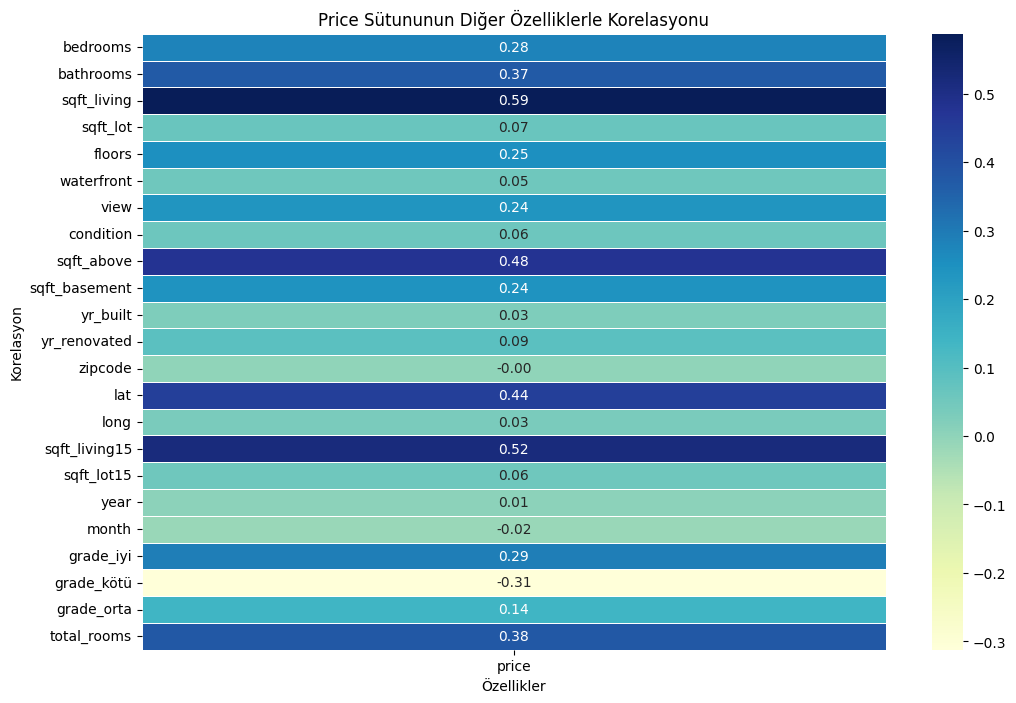

In [20]:
import seaborn as sns

heat_data = data_cleaned.corr()
price_corr = heat_data[['price']].drop(['price'])  # Sadece 'price' sütununu al ve 'price' sütununu çıkar

plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlama
sns.heatmap(price_corr, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)

plt.title('Price Sütununun Diğer Özelliklerle Korelasyonu')
plt.xlabel('Özellikler')
plt.ylabel('Korelasyon')
plt.show()

Ön işeleme işlemleri sonrası korelasyonlarımızı incelediğimiz de olumlu farkları görebiliyoruz.

# Model

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

def error_calculator(test, pred):
  # MAE
  mae = mean_absolute_error(test, pred)
  # MSE
  mse = mean_squared_error(test, pred, squared=False)
  # RMSE
  rmse = np.sqrt(mse)
  # MAPE
  mape = mean_absolute_percentage_error(test, pred) * 100
  # R2
  r2 = r2_score(test, pred)

  return f"{mae:.2f}", f"{mse:.2f}", f"{rmse:.2f}", mape, r2

error_calculator fonksiyonu, modellerimizin test ve tahmin değerlerini alarak hata hesaplamalarını geriye döndürür. 

In [22]:
def pred_plot(test, pred, model = ""):
  # Figure ve Subplot ayarları
  plt.figure(figsize=(14, 8))
  # İkinci Subplot (Scatter Plot)
  plt.subplot(2, 1, 2)
  plt.scatter(range(len(test)), test, color='blue', label='Gerçek Değerler', alpha=1)
  plt.scatter(range(len(pred)), pred, color='red', label='Tahmin Değerleri', alpha=0.3, marker="x")
  plt.title(f'({model}) Gerçek ve Tahmin Değerleri')
  plt.xlabel('Fiyat')
  plt.ylabel('Değer')
  plt.legend()
  plt.grid(True)

  # Grafiği göster
  plt.tight_layout()
  plt.show()

pred_plot fonksiyonu, modellerimizin test ve tahmin değerlerini ve model ismini alarak gerçek ve tahmini değerleri görselleştirir.

In [23]:
# Özellikler (X) ve hedef değişkeni (y) tanımla
X = data_cleaned.drop(['price'], axis=1)
y = data_cleaned['price']

Tahmin etmek istediğimiz değer price (fiyat) olduğu için data dan price sütunu çıkarıp X değişkenine atıyoruz.
Y değişkenine yani hedef değişkenimize price sütununun değerlerini atıyoruz.

In [24]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verisi olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

Verilerimizi %70 eğitim ve %30 test olarak 2 ye ayırıyoruz. 

### Basit Model

In [25]:
# Ortalama fiyat tahmin modeli
mean_model = np.full_like(y_test, y_test.mean(), dtype=np.float64)
# Medyan fiyat tahmin modeli
median_model = np.full_like(y_test, y_test.median(), dtype=np.float64)

median_mae, median_mse, median_rmse, median_mape, median_r2 = error_calculator(y_test, median_model)
print(f"Median Model mse: {median_mse}")
print(f"Median Model RMSE: {median_rmse}")
print(f"Median Model mape: {round(median_mape)} %")
print(f"Median Model r2: {median_r2}")
print("-" * 25)
mean_mae, mean_mse, mean_rmse, mean_mape, mean_r2 = error_calculator(y_test, mean_model)
print(f"Mean Model mse: {mean_mse}")
print(f"Mean Model RMSE: {mean_rmse}")
print(f"Mean Model mape: {round(mean_mape)} %")
print(f"Mean Model r2: {mean_r2}")

Median Model mse: 204816.98
Median Model RMSE: 452.57
Median Model mape: 40 %
Median Model r2: -0.032205504147433395
-------------------------
Mean Model mse: 201596.45
Mean Model RMSE: 448.99
Mean Model mape: 44 %
Mean Model r2: 0.0


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


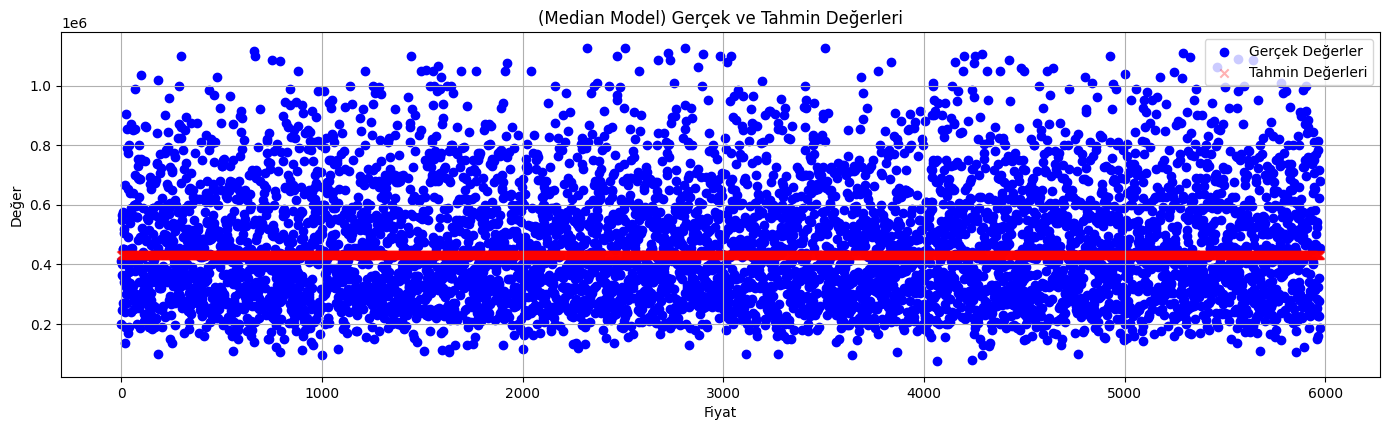

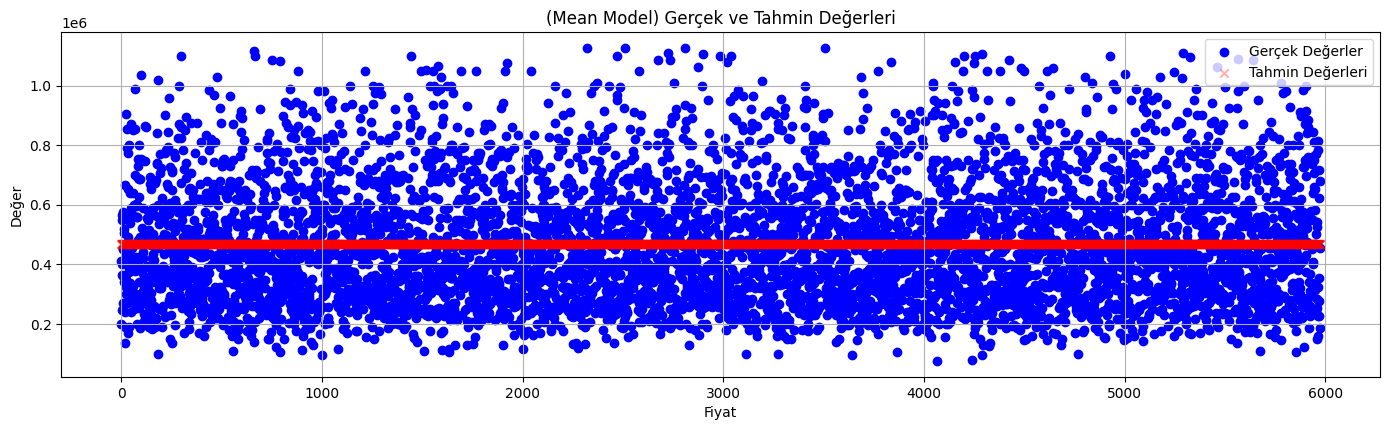

In [26]:
pred_plot(y_test, median_model, "Median Model")
pred_plot(y_test, mean_model, "Mean Model")

### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

# Linear Regression modeli eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_lr_pred = lr_model.predict(X_test)

In [29]:
mae, mse, rmse, mape, r2 = error_calculator(y_test, y_lr_pred)

print(f"Linear Regression mse: {mse}")
print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression mape: {round(mape)} %")
print(f"Linear Regression r2: {r2}")

Linear Regression mse: 118803.73
Linear Regression RMSE: 344.68
Linear Regression mape: 21 %
Linear Regression r2: 0.6527083191324357


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


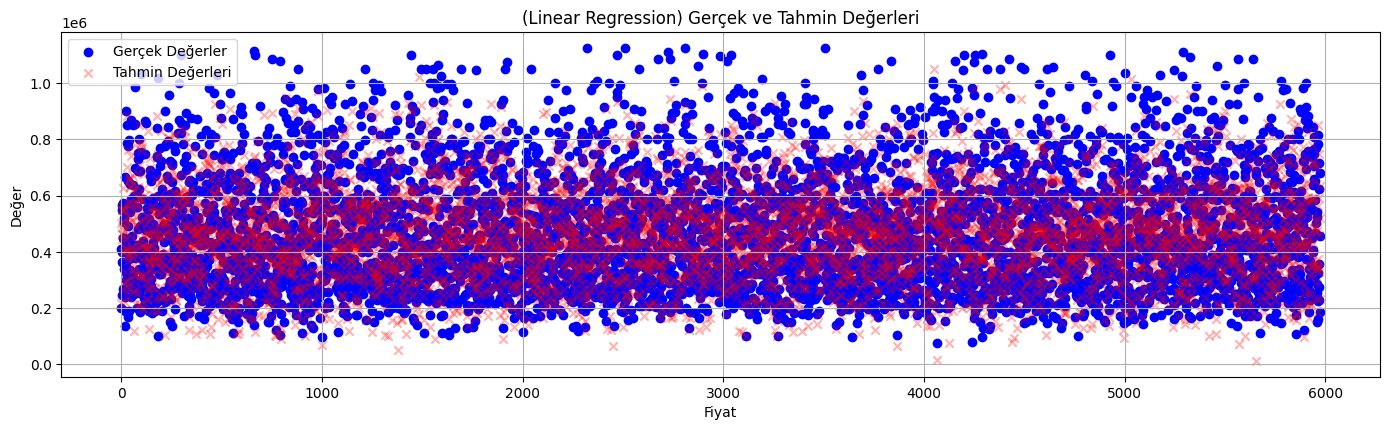

In [30]:
pred_plot(y_test, y_lr_pred, "Linear Regression")

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor modeli eğit
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_rf_pred = rf_model.predict(X_test)

In [33]:
mae, mse, rmse, mape, r2= error_calculator(y_test, y_rf_pred)

print(f"Random Forest mse: {mse}")
print(f"Random Forest RMSE: {rmse}")
print(f"Random Forest mape: {round(mape)} %")
print(f"Random Forest r2: {r2}")

Random Forest mse: 76852.09
Random Forest RMSE: 277.22
Random Forest mape: 13 %
Random Forest r2: 0.8546732371589015


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


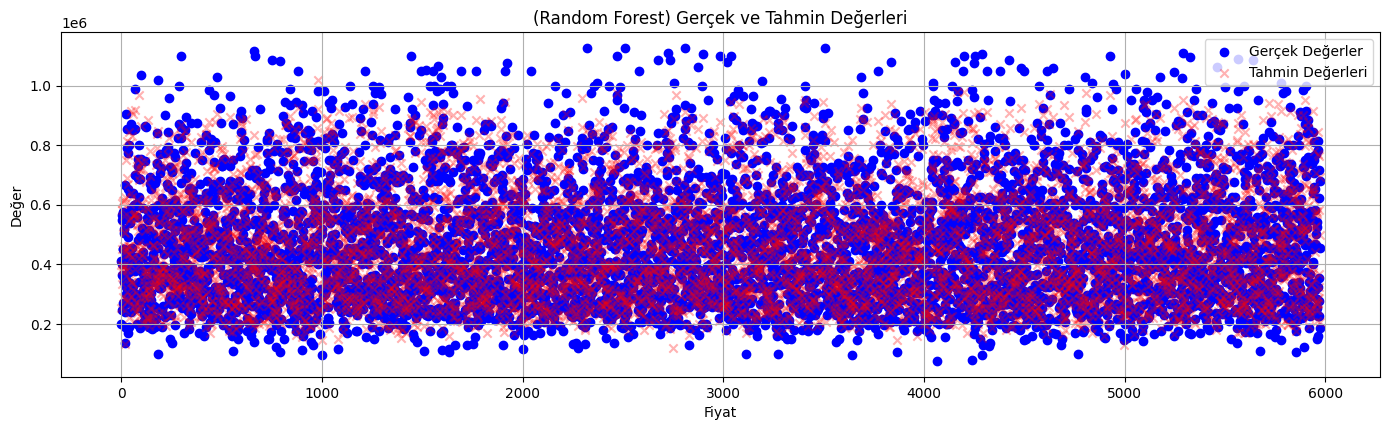

In [34]:
pred_plot(y_test, y_rf_pred, "Random Forest")

### Lightgbm

In [35]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(force_col_wise=True)
lgb_model.fit(X_train, y_train)
y_lightgbm_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Total Bins 2264
[LightGBM] [Info] Number of data points in the train set: 13940, number of used features: 23
[LightGBM] [Info] Start training from score 467198.979268


In [36]:
mae, mse, rmse, mape, r2 = error_calculator(y_test, y_lightgbm_pred)

print(f"lightgbm mse: {mse}")
print(f"lightgbm RMSE: {rmse}")
print(f"lightgbm mape: {round(mape)} %")
print(f"lightgbm r2: {r2}")

lightgbm mse: 72018.64
lightgbm RMSE: 268.36
lightgbm mape: 12 %
lightgbm r2: 0.872378450230229


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


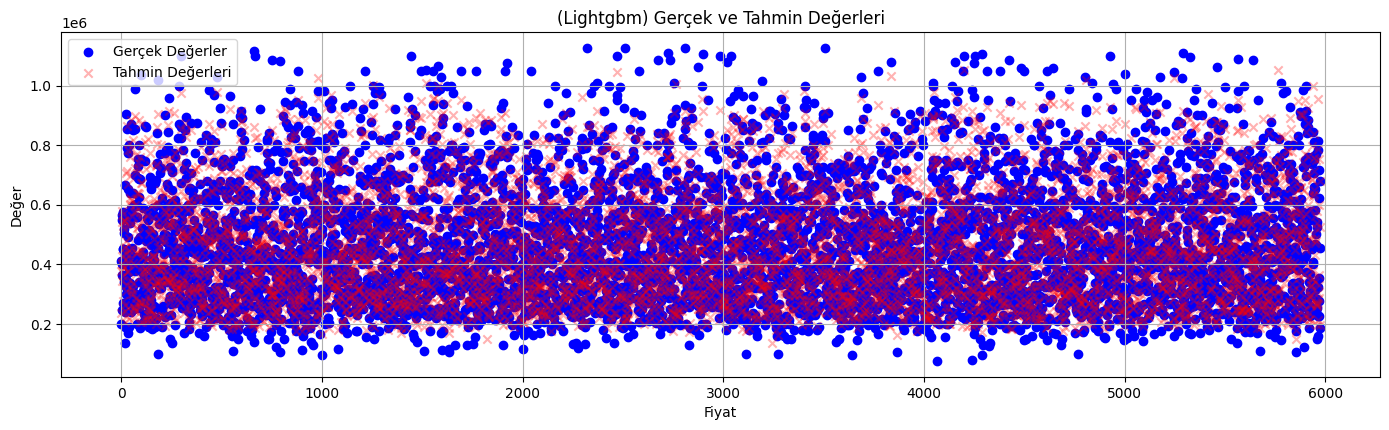

In [37]:
pred_plot(y_test, y_lightgbm_pred, "Lightgbm")

### Gradient Boosting Regressor

In [38]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(estimator=gbr_model, param_distributions=param_distributions, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

best_gbr = random_search.best_estimator_
gbr_y_pred = best_gbr.predict(X_test)


mae, mse, xgb_rmse, xgb_mape, _ = error_calculator(y_test, gbr_y_pred)

print(f"Gradient Boosting Regression RMSE: {xgb_rmse}")
print(f"Gradient Boosting Regression mape: {round(xgb_mape)} %")
print(f'En İyi Hiperparametreler: {random_search.best_params_}')
print(f'En İyi Skor: {random_search.best_score_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Gradient Boosting Regression RMSE: 271.51
Gradient Boosting Regression mape: 12 %
En İyi Hiperparametreler: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}
En İyi Skor: 0.8515490019785915
CPU times: total: 16.9 s
Wall time: 4min 58s


c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### XGBoost Regressor

In [39]:
import xgboost as xgb
# XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

mae, mse, xgb_rmse, xgb_mape, _ = error_calculator(y_test, xgb_y_pred)

c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Modelleri Karşılaştırma

In [40]:
# Ortalama model hataları
_, _, rmse_mean, mape_mean, r2_mean = error_calculator(y_test, mean_model)

# Medyan model hataları
_, _, rmse_median, mape_median, r2_median = error_calculator(y_test, median_model)

# Doğrusal regresyon hataları
_, _, rmse_linear, mape_linear, r2_linear = error_calculator(y_test, y_lr_pred)

# Decision Tree hataları
_, _, rmse_tree, mape_tree, r2_tree = error_calculator(y_test, y_rf_pred)

# Lightgbm hataları
_, _, rmse_lightgbm, mape_lightgbm, r2_lightgbm = error_calculator(y_test, y_lightgbm_pred)

# Gradient Boosting Regressor hataları
_, _, rmse_gbr, mape_gbr, r2_gbr = error_calculator(y_test, gbr_y_pred)

# XGBRegressor hataları
_, _, rmse_xgb, mape_xgb, r2_xgb = error_calculator(y_test, xgb_y_pred)

c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ismai\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [41]:
rmse_values = pd.DataFrame([{
    "rmse": rmse_mean,
    "r2": r2_mean,
    "model": "Mean Model"
}, {
    "rmse": rmse_median,
    "r2": r2_median,
    "model": "Median Model"
}, {
    "rmse": rmse_linear ,
    "r2": r2_linear,
    "model": "Linear Model"
}, {
    "rmse": rmse_tree,
    "r2": r2_tree,
    "model": "Decision Tree Model"
}, {
    "rmse": rmse_lightgbm,
    "r2": r2_lightgbm,
    "model": "Lightgbm Model"
}, {
    "rmse": rmse_gbr,
    "r2": r2_gbr,
    "model": "Gradient Boosting Regressor Model"
}, {
    "rmse": rmse_xgb,
    "r2": r2_xgb,
    "model": "XGBRegressor Model"
}])

rmse_values = rmse_values.sort_values(by="rmse").reset_index().drop(["index"], axis=1)

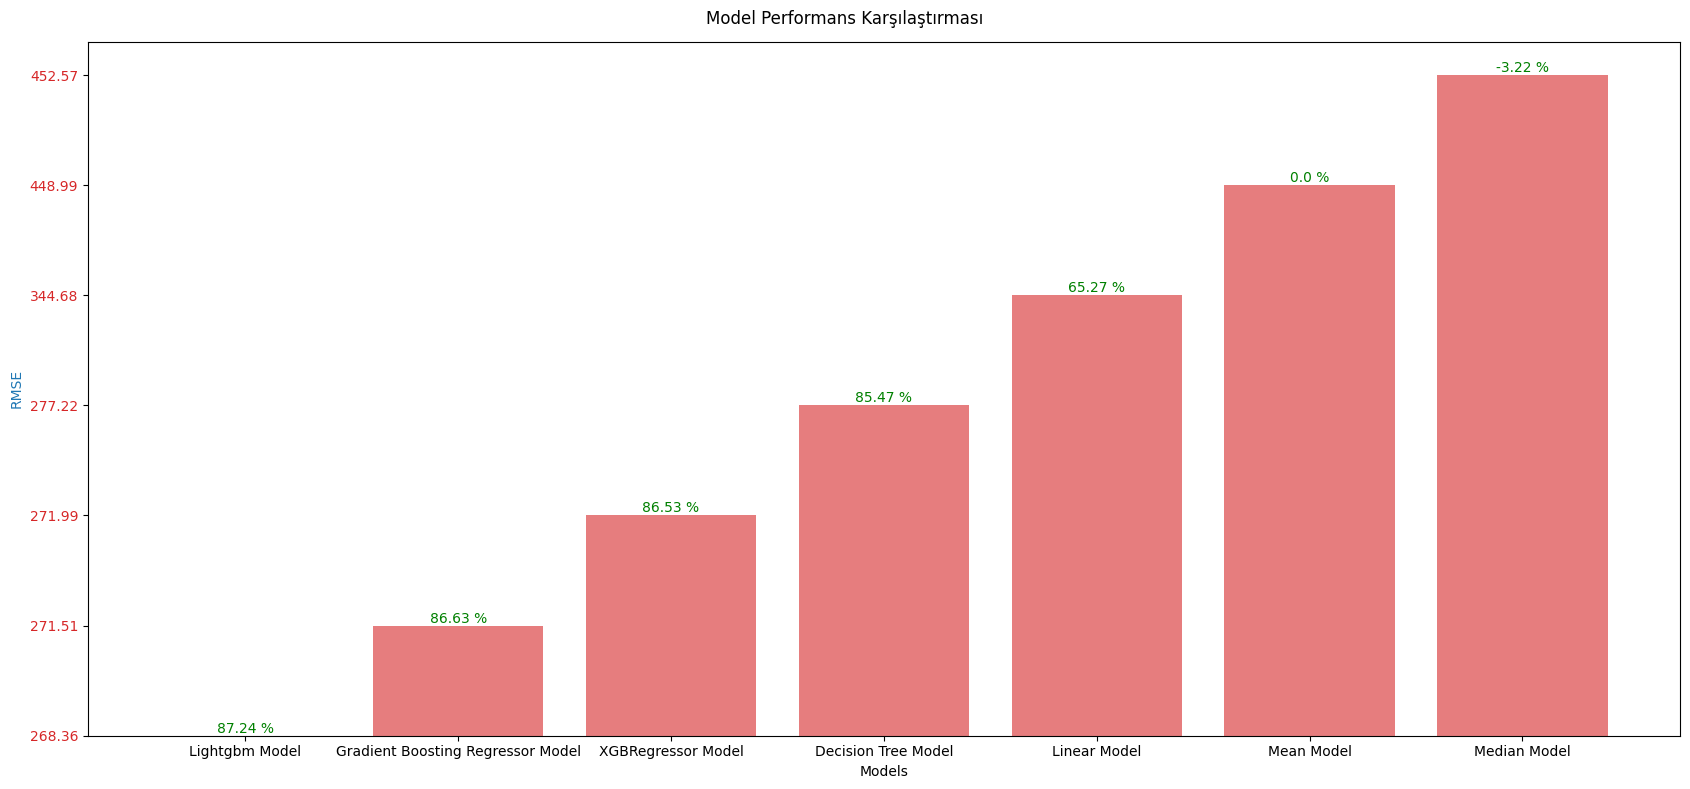

In [42]:
# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(17, 8))

# RMSE için çubuk grafiği
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE', color='tab:blue')
bars = ax1.bar(rmse_values["model"], rmse_values["rmse"], color='tab:red', alpha=0.6, label='RMSE')
ax1.tick_params(axis='y', labelcolor='tab:red')

for i in range(len(bars)):
    bar = bars[i]
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, str(round(rmse_values["r2"][i] * 100, ndigits=2)) + " %", va='bottom', ha='center', color='green')


# Başlık ve gösterge ekleme
fig.suptitle('Model Performans Karşılaştırması')
fig.tight_layout()
plt.show()

Veri setimizi çoğalttığımız zaman XGBRegressor Model ve Gradient Boosting Regressor modellerinin büyük veri setlerinde daha iyi çalıştığını gözlemledik.